In [3]:
import urllib.request
from bs4 import BeautifulSoup
import re

## Anon web scraper
def anonUrlopen(url):
    req = urllib.request.Request(
    url, 
    data=None, 
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    }
    )
    return urllib.request.urlopen(req)

# Returns a list of links from the url
def getLinks(url):
    webPage = anonUrlopen(url)
    bsObj = BeautifulSoup(webPage.read());

    linkList = []

    for link in bsObj.find_all('a', attrs={'href': re.compile("/")}):
        # display the actual urls
        linkList.append(link.get('href'))  
    
    return linkList

# Returns a list of headlines from the url
def getText(url): 
    webPage = anonUrlopen(url)
    bsObj = BeautifulSoup(webPage, 'html.parser')

    headlines = bsObj.find_all('a',{'class':'title'})

    headlinesList = []
    for i in range(len(headlines)):
        headlinesList.append(headlines[i].text)
    return(headlinesList)






In [4]:
list1 = getLinks("https://www.dazeddigital.com/")

allHeadlines = []

for link in list1:
    if not re.search('.com', link) and not re.search('http', link):
        url = "https://www.dazeddigital.com" + link
    allHeadlines.append(getText(url))
    
print(allHeadlines)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

[['Julien Dossena and Adèle Exarchopoulos on Titanic, Bowie, and wild boars', 'Julien Dossena and Adèle Exarchopoulos on Titanic, Bowie, and wild boars', 'Elliot Page’s new memoir will tackle ‘the cesspool that Hollywood can be’', 'Imruh Asha is appointed Fashion Director of Dazed', 'Megan Thee Stallion to star in new A24 musical comedy', '8 fantasy worlds we’d rather live in than Disney’s deranged home community', 'Inside Places+Faces superstar-studded book of Polaroids', '7 albums to stream this week', 'Inventing Anna proves that money is fake and status is everything', '‘Pick me boys’ are roleplaying consent for clout on TikTok', 'Yes, we miss the old Kanye – but how much has he really changed?', 'How ‘writing a book’ became the ultimate influencer status symbol', 'Collina Strada channelled Ashley Tisdale at the Teen Choice Awards for AW22', 'Protesters assemble outside Molly-Mae’s not so pretty little runway show', 'A trip through Caroline Polachek’s cerebral dreamworld', 'Author G

In [55]:
from collections import Counter
import numpy

def getMostCommonWords(website):
    list1 = getLinks(website)

    allHeadlines = []

    for link in list1:
        if not re.search('.com', link) and not re.search('http', link):
            url = website[:-1] + link
        allHeadlines.append(getText(url))
    
    ## We got all the headlines but they are in a nested array, hence we flatten the array and remove the duplicates
    flat_list = list(numpy.concatenate(allHeadlines).flat)
    headlines = list(dict.fromkeys(flat_list))
    
    ## Find most common words in the headlines
    joinedHeadlines = ' '.join(headlines)

    split_it = joinedHeadlines.split()

    # Pass the split_it list to instance of Counter class.
    myCounter = Counter(split_it)

    # most_common() produces k frequently encountered
    # input values and their respective counts.
    most_occur = myCounter.most_common(30)
    
    return most_occur
    

In [ ]:
getMostCommonWords("https://www.dazeddigital.com/")

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [8]:
## We got all the headlines but they are in a nested array, hence we flatten the array and remove the duplicates
import numpy

flat_list = list(numpy.concatenate(allHeadlines).flat)
headlines = list(dict.fromkeys(flat_list))


In [46]:
## Find most common words in the headlines

from collections import Counter

joinedHeadlines = ' '.join(headlines)

split_it = joinedHeadlines.lower().split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common()
  
print(most_occur)

[('the', 100), ('of', 50), ('to', 44), ('a', 42), ('is', 40), ('and', 26), ('beauty', 24), ('are', 22), ('in', 19), ('for', 18), ('this', 15), ('new', 14), ('with', 13), ('on', 12), ('an', 12), ('about', 11), ('you', 10), ('how', 9), ('will', 8), ('from', 8), ('all', 8), ('photos', 7), ('into', 7), ('guide', 7), ('love', 7), ('dazed', 6), ('everything', 6), ('show', 6), ('after', 6), ('her', 6), ('watch', 6), ('what', 6), ('tiktok’s', 6), ('we', 5), ('looks', 5), ('or', 5), ('your', 5), ('art', 5), ('artists', 5), ('black', 5), ('know', 5), ('skincare', 5), ('that', 4), ('fashion', 4), ('fantasy', 4), ('inside', 4), ('tiktok', 4), ('has', 4), ('became', 4), ('ultimate', 4), ('london', 4), ('5', 4), ('shayne', 4), ('great', 4), ('victory', 4), ('their', 4), ('creator', 4), ('brand', 4), ('intimate', 4), ('young', 4), ('back', 4), ('by', 4), ('mix:', 4), ('house', 4), ('it', 4), ('life', 4), ('his', 4), ('hair', 4), ('eye', 4), ('nail', 4), ('future', 4), ('season', 4), ('make-up', 4), (

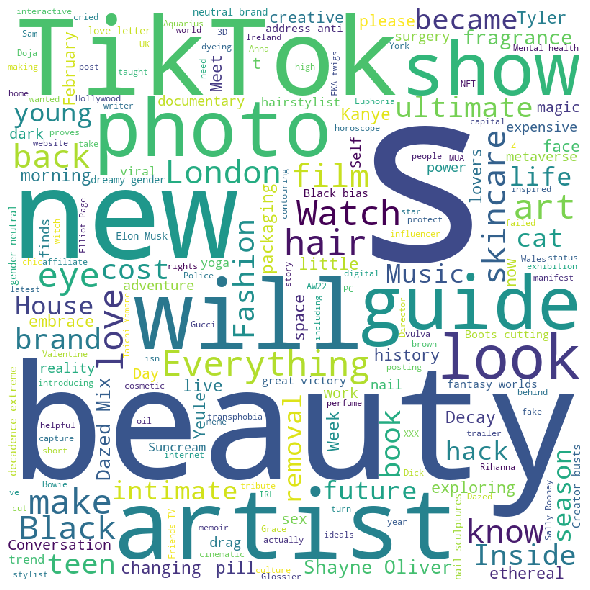

In [54]:
## Word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(joinedHeadlines)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()